In [161]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
from scipy.stats import norm

In [244]:
mu = 50
c = 2
std = np.sqrt(c * mu**2)

In [245]:
samples = norm(mu, std).rvs(1000)

(array([  7.,  44.,  77., 203., 243., 228., 138.,  50.,   6.,   4.]),
 array([-177.61920154, -129.4777961 ,  -81.33639066,  -33.19498523,
          14.94642021,   63.08782565,  111.22923109,  159.37063653,
         207.51204197,  255.6534474 ,  303.79485284]),
 <BarContainer object of 10 artists>)

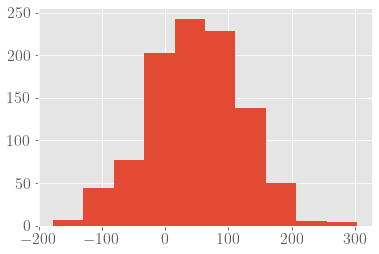

In [246]:
plt.hist(samples)

In [247]:
num =  np.sum(samples) - np.sqrt(np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2) )
den = 2 * len(samples) * c
mle = num / den

/var/folders/5t/ltqvfkd124z1n5v3ntgw77d40000gn/T/ipykernel_70116/3159869695.py:1: RuntimeWarning: invalid value encountered in sqrt
  num =  np.sum(samples) - np.sqrt(np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2) )


In [248]:
mle

nan

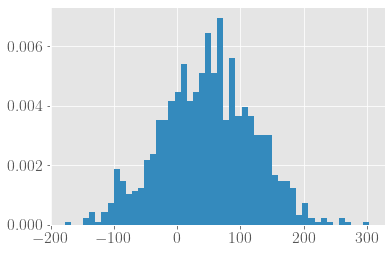

In [249]:
x = np.linspace(samples.min(), samples.max(), 1000)
plt.plot(x, norm(mle, np.sqrt(mle**2 * c)).pdf(x))
plt.hist(samples, density=True, bins=50);

In [250]:
np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2)

-58476555400.923195

In [251]:
np.sum(samples)**2 - 4 * len(samples) * c * np.sum(samples**2)

-58476555400.923195